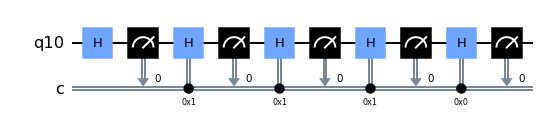

Observe "0": 4688 "1": 5312
Simulator:  {'0': 4694, '1': 5306}


In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from random import randrange

q = QuantumRegister(1)
c = ClassicalRegister(1,"c")
qc = QuantumCircuit(q,c)

shot = 10000

observe = [0,0]

qc.h(q[0])
qc.measure(q,c)
observe = [shot/2,shot/2]

for i in range(4):
    x = randrange(2)
    if x==0:
        observe[0] = observe[0] / 2 
        observe[1] = observe[1] + observe[0]
    else:
        observe[1] = observe[1] / 2 
        observe[0] = observe[0] + observe[1]
    qc.h(q[0]).c_if(c,x)
    qc.measure(q,c)


display(qc.draw(output="mpl"))
print('Observe: "0":',round(observe[0]),'"1":',round(observe[1]))

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=shot)
counts = job.result().get_counts(qc)   
print('Simulator: ',counts)